In [5]:
#File conversion

from pydub import AudioSegment

m4a_file = "lydFiler\\Innspilling_.m4a" # I have downloaded sample audio from this link https://getsamplefiles.com/sample-audio-files/m4a
wav_filename = "lydFiler\\wafSpecto=utput.wav"

sound = AudioSegment.from_file(m4a_file, format='m4a')
file_handle = sound.export(wav_filename, format='wav')

#print(inns)


C:\Users\hanur\AppData\Local\Programs\Python\Python312\Lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified

C:\Users\hanur\AppData\Local\Temp\ipykernel_9032\637708649.py:15: UserWarning: nperseg = 32678 is greater than input length  = 2, using nperseg = 2
  f_axis, t_axis, Sxx = spectrogram(xn,                # Fullt signal
C:\Users\hanur\AppData\Local\Temp\ipykernel_9032\637708649.py:27: RuntimeWarning: divide by zero encountered in log10
  10*np.log10(Sxx),  # Konvertering av spektrogrammatrise til logaritmisk skala


TypeError: Dimensions of C (110295, 1013, 1) should be one smaller than X(1) and Y(1013) while using shading='flat' see help(pcolormesh)

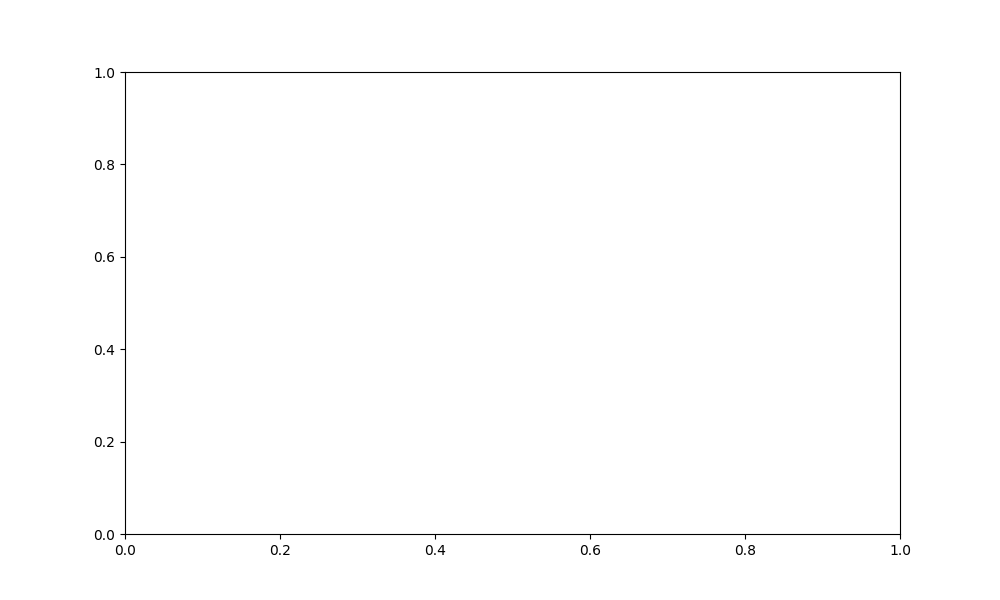

In [32]:
from numpy import sin, cos, pi, exp, empty, mean, absolute, angle # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
import scipy.signal.windows as win          # Importerer funksjonalitet for å generere en rekke vindusfunksjoner
from scipy.io import loadmat, savemat, wavfile               # Lesing av data fra '.mat' fil
from scipy.signal import spectrogram        # Lar oss generere et spektrogram som analyserer et signal i tid og frekvens

%matplotlib ipympl

fs, data = wavfile.read('lydFiler\\Lenna_(test_image).wav') 
xn = data/0x8000


nperseg = min(len(xn), 1024)

f_axis, t_axis, Sxx = spectrogram(xn,                # Fullt signal
                                  fs,                # Samplingsfrekvens
                                  window = 'boxcar', # Vindusfunksjon (rektangulær)
                                  nperseg = 32678,     # Vinduslengde
                                  noverlap = 1,      # Antall sampler overlapping
                                  nfft = 2024,        # Oppløsning på DFT etter zero padding
                                  )

plt.close(1);plt.figure(1, figsize=(10,6))

plt.pcolormesh(t_axis,            # Array med tidsstempel. Produsert av spectrogram()
               f_axis,            # Array med frekvenser. Produsert av spectrogram()
               10*np.log10(Sxx),  # Konvertering av spektrogrammatrise til logaritmisk skala
               vmax =-15,         # Høyeste dB-verdi på fargekartet
               vmin = -70,        # Laveste dB-verdi på fargekartet
               shading='auto'
               );
plt.colorbar(aspect=50, label=r'Spectral Density (dB/Hz)')

#plt.ylim([0, 240]) # Du kan justere på grensene i y-aksen dersom du vil inspisere en spesiell del av plottet
#plt.xlim([0, 15]) # Du kan justere på grensene i x-aksen dersom du vil inspisere en spesiell del av plottet
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=1.0)
plt.show()

(312480,)
(312480,)


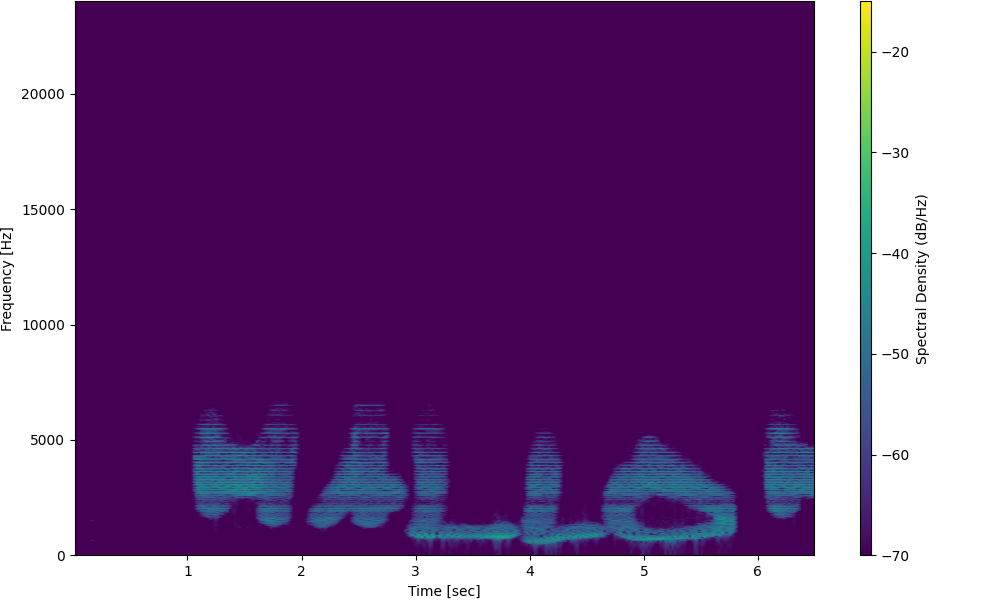

In [43]:
from numpy import sin, cos, pi, exp, empty, mean, absolute, angle
from numpy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal.windows as win
from scipy.io import loadmat, savemat, wavfile
from scipy.signal import spectrogram

fs, data = wavfile.read(f'lydFiler\\test.wav') 
xn = data / 0x8000

print(f'{(data).shape}')
print(f'{(xn).shape}')


# Set nperseg to a smaller value to avoid the warning
nperseg = min(len(xn), 1024)

# Generate the spectrogram
f_axis, t_axis, Sxx = spectrogram(xn, 
                                  fs, 
                                  window='boxcar', 
                                  nperseg=nperseg, 
                                  noverlap=1, 
                                  nfft=2024)

# Avoid log10 issues by adding a small epsilon to Sxx
Sxx[Sxx == 0] = 1e-10

# Plot the spectrogram
plt.close(1)
plt.figure(1, figsize=(10,6))
plt.pcolormesh(t_axis, f_axis, 10 * np.log10(Sxx), shading='gouraud', vmin=-70, vmax=-15)
plt.colorbar(aspect=50, label='Spectral Density (dB/Hz)')

plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout(pad=0.1, w_pad=1.0, h_pad=1.0)
plt.show()